In [ ]:
# some histogram ananlysis tools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# reas the first file from the file
import xarray as xr
import pandas as pd
import re
from collections import defaultdict
import glob

# Inputs

In [ ]:
# read the initial points from a file
# read the initial position file 
path = '/home/abolmaal/modelling/FVCOM/Huron/input/initial_position'
initial_positions_file = os.path.join(path, 'initial_positions_releasezone_intersection_multigroup_midplume_lastrevised.dat')


# Output

In [102]:
out_path = '/home/abolmaal/modelling/FVCOM/Huron/Sanitiy'
Initial_position_nutrientLoad = os.path.join(out_path, 'Initial_position_nutrientLoad.csv')

# Checking the Group _ids in Pylag Initial Position file

In [59]:
# read the initial_positions file
df = pd.read_csv(initial_positions_file, sep=' ',header=None, names=['group_id', 'lon', 'lat', 'depth'])
df

,group_id,lon,lat,depth
0,8550,NaN,NaN,NaN
1,0,275.3339,45.7428,0.0
2,0,275.3351,45.7428,0.0
3,0,275.3363,45.7428,0.0
4,0,275.3375,45.7428,0.0
...,...,...,...,...
8546,162,276.1465,43.6591,0.0
8547,162,276.1477,43.6591,0.0
8548,162,276.1489,43.6591,0.0
8549,162,276.1501,43.6591,0.0


In [60]:
# Add a column 'group_number' that is the index of each occurrence of group_id (starts from 0)
df['group_number'] = df.groupby('group_id').cumcount()

# Example: combine group_id and group_number into a new column if you want a unique identifier
df['group_id_number'] = df['group_id'].astype(str) + '_' + df['group_number'].astype(str)

In [61]:
# change the order of df to have group_id, group_number, lon, lat, depth
df = df[['group_id','group_id_number' ,'group_number', 'lon', 'lat', 'depth']]
df

,group_id,group_id_number,group_number,lon,lat,depth
0,8550,8550_0,0,NaN,NaN,NaN
1,0,0_0,0,275.3339,45.7428,0.0
2,0,0_1,1,275.3351,45.7428,0.0
3,0,0_2,2,275.3363,45.7428,0.0
4,0,0_3,3,275.3375,45.7428,0.0
...,...,...,...,...,...,...
8546,162,162_70,70,276.1465,43.6591,0.0
8547,162,162_71,71,276.1477,43.6591,0.0
8548,162,162_72,72,276.1489,43.6591,0.0
8549,162,162_73,73,276.1501,43.6591,0.0


In [8]:
num_unique = df['group_id'].nunique()
print("Number of StreamWatersheds:", num_unique)

Number of StreamWatersheds: 115


In [9]:
#show the minumun number of occurance of a group_id in the file
min_group_id = df['group_id'].min()
min_points = df['group_id'].value_counts().max()
print("Minimum number of particles released from each watershed in any group:", min_points)

Minimum number of particles released from each watershed in any group: 75


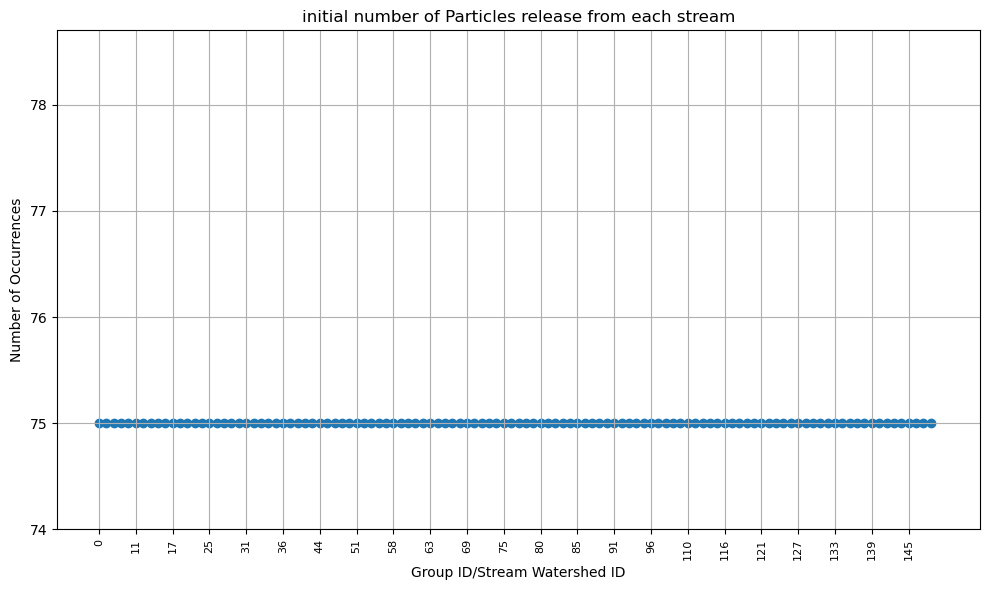

In [22]:
# Count each unique group_id
group_counts = df['group_id'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(group_counts.index.astype(str), group_counts.values)
plt.xlabel('Group ID/Stream Watershed ID')
plt.ylabel('Number of Occurrences')
plt.title('initial number of Particles release from each stream')
plt.ylim(74)  # Set y-axis limit to start from 0

# Show every 5th label (adjust as needed)
labels = group_counts.index.astype(str)
plt.xticks(ticks=np.arange(0, len(labels), 5), labels=labels[::5], rotation=90, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

# reading the Stream watersheds

In [77]:
Streamwateshed_Nutrient_Loads = pd.read_csv('/mnt/d/Users/abolmaal/Arcgis/NASAOceanProject/ZonalStats/StreamWatresheds_total_N_P.csv')

In [78]:
Streamwateshed_Nutrient_Loads

,StWater_id,Shape_Area,StreamDirectTP_kgday,StreamDirectTN_kgday,StreamDirectTN_grm2yr,StreamDirectTP_grm2yr,StreamDirectTN_kgdayperparticle,StreamDirectTP_kgdayperparticle
0,0,2.608193e+07,0.974675,13.480809,0.188655,0.013640,0.718976,0.051983
1,1,6.915027e+07,2.000936,51.878555,0.273834,0.010562,2.766856,0.106717
2,2,1.703711e+08,4.179389,87.793043,0.188086,0.008954,4.682296,0.222901
3,3,9.425426e+07,3.598198,54.996792,0.212975,0.013934,2.933162,0.191904
4,4,3.772995e+07,1.326998,27.250568,0.263622,0.012837,1.453364,0.070773
...,...,...,...,...,...,...,...,...
140,170,1.961733e+07,4.299652,63.984811,1.190501,0.079999,3.412523,0.229315
141,171,1.228468e+03,0.000563,0.013980,4.153712,0.167337,0.000746,0.000030
142,173,1.396735e+07,4.034916,23.636322,0.617673,0.105442,1.260604,0.215196
143,174,7.877722e+06,2.496025,14.078233,0.652289,0.115649,0.750839,0.133121


In [79]:
# count the nember of unique StWater_id in the Streamwateshed_Nutrient_Loads
num_unique_streamwatersheds = Streamwateshed_Nutrient_Loads['StWater_id'].nunique()
print("Number of unique StreamWatersheds in the nutrient loads file:", num_unique_streamwatersheds)

Number of unique StreamWatersheds in the nutrient loads file: 145


### match initial position file with Streamwatershed file

In [80]:
df1 = df
df2 = Streamwateshed_Nutrient_Loads

In [81]:
# Rename df2's column for merging
df2 = df2.rename(columns={'StWater_id': 'group_id'})

# Step 1: Count how many times each group_id occurs in df
group_counts = df['group_id'].value_counts().rename_axis('group_id').reset_index(name='count')

# Step 2: Merge counts into df2 (to know how many times to repeat each row)
df2_expanded = df2.merge(group_counts, on='group_id', how='inner')  # Only keep matches

# Step 3: Repeat each row in df2 based on the count
df2_repeated = df2_expanded.loc[df2_expanded.index.repeat(df2_expanded['count'])].reset_index(drop=True)

# Step 4: Reset index on df and df2_repeated to ensure alignment
df = df[df['group_id'].isin(df2_repeated['group_id'])]  # Filter only matching group_ids
df = df.reset_index(drop=True)
df2_repeated = df2_repeated.drop(columns='count').reset_index(drop=True)

# Step 5: Concatenate the two DataFrames
merged_df = pd.concat([df, df2_repeated], axis=1)

In [92]:
merged_df.columns

Index(['group_id', 'group_id_number', 'group_number', 'lon', 'lat', 'depth',
       'group_id_stream', 'Shape_Area', 'StreamDirectTP_kgday',
       'StreamDirectTN_kgday', 'StreamDirectTN_grm2yr',
       'StreamDirectTP_grm2yr', 'StreamDirectTN_kgdayperparticle',
       'StreamDirectTP_kgdayperparticle'],
      dtype='object')

In [93]:
# remove the column StreamDirectTN_kgdaypertparticle and StreamDirectTP_kgdaypertparticle
merged_df = merged_df.drop(columns=['StreamDirectTN_kgdayperparticle', 'StreamDirectTP_kgdayperparticle'])


In [94]:
# print the number of unique group_id in the merged_df
num_unique_merged = merged_df['group_id'].nunique()
print("Number of unique group_id in the merged DataFrame:", num_unique_merged)

Number of unique group_id in the merged DataFrame: 114


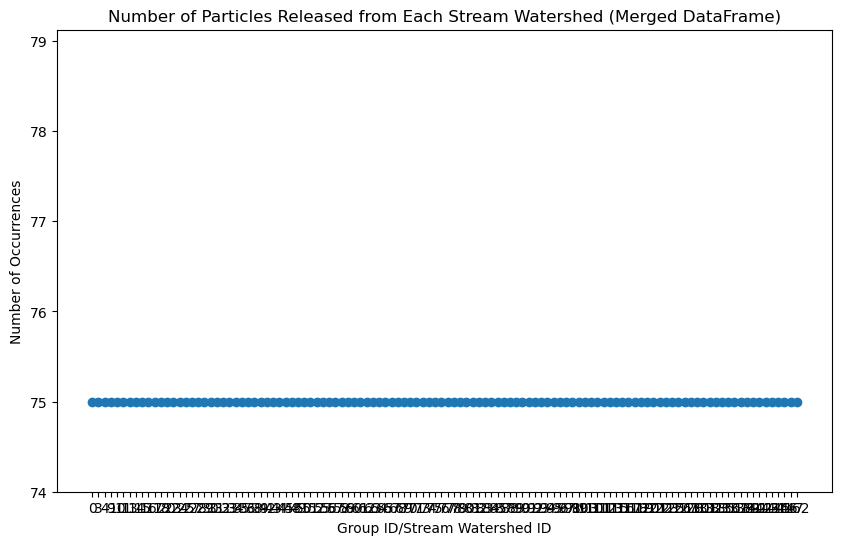

In [88]:
df2_repeated = df2_repeated.rename(columns={'group_id': 'group_id_stream'})

# Now concatenate again:
merged_df = pd.concat([df, df2_repeated], axis=1)

# Now you can safely count occurrences of the original group_id:
group_counts_merged = merged_df['group_id'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(group_counts_merged.index.astype(str), group_counts_merged.values)
plt.xlabel('Group ID/Stream Watershed ID')
plt.ylabel('Number of Occurrences')
plt.title('Number of Particles Released from Each Stream Watershed (Merged DataFrame)')
plt.ylim(74)  # Set y-axis limit to start from 0
plt.show()

In [95]:
# Step 1: Count the number of occurrences of each group_id in merged_df
group_counts = merged_df['group_id'].value_counts().rename_axis('group_id').reset_index(name='count')

# Step 2: Merge the counts into merged_df
merged_df = merged_df.merge(group_counts, on='group_id', how='left')

# Step 3: Create the new per-particle columns
merged_df['StreamDirectTN_kgdayperparticle'] = merged_df['StreamDirectTN_kgday'] / merged_df['count']
merged_df['StreamDirectTP_kgdayperparticle'] = merged_df['StreamDirectTP_kgday'] / merged_df['count']

# Step 4: (Optional) Drop the 'count' column if you no longer need it
merged_df.drop(columns='count', inplace=True)

In [97]:
# show minimum and maximum of the StreamDirectTN_kgdayperparticle and StreamDirectTP_kgdayperparticle
print("Minimum StreamDirectTN_kgdayperparticle:", merged_df['StreamDirectTN_kgdayperparticle'].min())
print("Maximum StreamDirectTN_kgdayperparticle:", merged_df['StreamDirectTN_kgdayperparticle'].max())
print("Minimum StreamDirectTP_kgdayperparticle:", merged_df['StreamDirectTP_kgdayperparticle'].min())
print("Maximum StreamDirectTP_kgdayperparticle:", merged_df['StreamDirectTP_kgdayperparticle'].max())

Minimum StreamDirectTN_kgdayperparticle: 0.00022639999999999997
Maximum StreamDirectTN_kgdayperparticle: 383.3635109333333
Minimum StreamDirectTP_kgdayperparticle: 4.286666666666667e-05
Maximum StreamDirectTP_kgdayperparticle: 13.290446013333334


In [109]:
# show minimum and maximum of the StreamDirectTN_kgdayperparticle and StreamDirectTP_kgdayperparticle
print("Minimum StreamDirectTN_kgdayperparticle:", merged_df['StreamDirectTN_kgday'].min())
print("Maximum StreamDirectTN_kgdayperparticle:", merged_df['StreamDirectTN_kgday'].max())
print("Minimum StreamDirectTP_kgdayperparticle:", merged_df['StreamDirectTP_kgday'].min())
print("Maximum StreamDirectTP_kgdayperparticle:", merged_df['StreamDirectTP_kgday'].max())

Minimum StreamDirectTN_kgdayperparticle: 0.01698
Maximum StreamDirectTN_kgdayperparticle: 28752.26332
Minimum StreamDirectTP_kgdayperparticle: 0.003215
Maximum StreamDirectTP_kgdayperparticle: 996.783451


In [110]:
merged_df

,group_id,group_id_number,group_number,lon,lat,depth,group_id_stream,Shape_Area,StreamDirectTP_kgday,StreamDirectTN_kgday,StreamDirectTN_grm2yr,StreamDirectTP_grm2yr,StreamDirectTN_kgdayperparticle,StreamDirectTP_kgdayperparticle
0,0,0_0,0,275.3339,45.7428,0.0,0,2.608193e+07,0.974675,13.480809,0.188655,0.013640,0.179744,0.012996
1,0,0_1,1,275.3351,45.7428,0.0,0,2.608193e+07,0.974675,13.480809,0.188655,0.013640,0.179744,0.012996
2,0,0_2,2,275.3363,45.7428,0.0,0,2.608193e+07,0.974675,13.480809,0.188655,0.013640,0.179744,0.012996
3,0,0_3,3,275.3375,45.7428,0.0,0,2.608193e+07,0.974675,13.480809,0.188655,0.013640,0.179744,0.012996
4,0,0_4,4,275.3387,45.7428,0.0,0,2.608193e+07,0.974675,13.480809,0.188655,0.013640,0.179744,0.012996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,162,162_70,70,276.1465,43.6591,0.0,162,1.496975e+10,996.783451,28752.263320,0.701052,0.024304,383.363511,13.290446
8546,162,162_71,71,276.1477,43.6591,0.0,162,1.496975e+10,996.783451,28752.263320,0.701052,0.024304,383.363511,13.290446
8547,162,162_72,72,276.1489,43.6591,0.0,162,1.496975e+10,996.783451,28752.263320,0.701052,0.024304,383.363511,13.290446
8548,162,162_73,73,276.1501,43.6591,0.0,162,1.496975e+10,996.783451,28752.263320,0.701052,0.024304,383.363511,13.290446


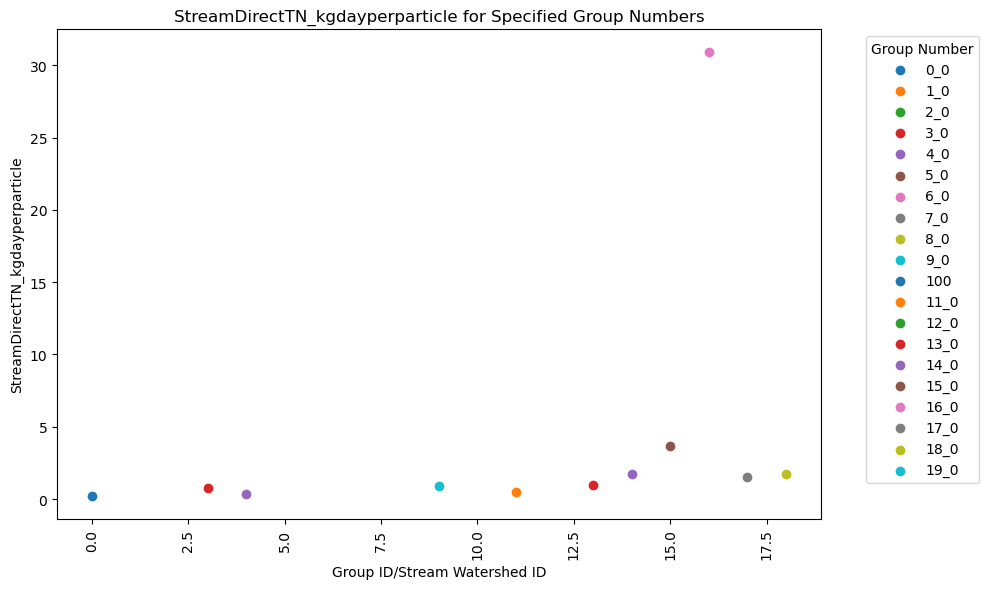

In [117]:
# plot the the StreamDirectTN_kgdayperparticle for each unique group_number=0_0,1_0,2_0,3_0,4_0,5_0,6_0,7_0,8_0,9_0
specifieds_group_numbers = ['0_0', '1_0', '2_0', '3_0', '4_0', '5_0', '6_0', '7_0', '8_0', '9_0',10_0, '11_0', '12_0', '13_0', '14_0', '15_0', '16_0', '17_0', '18_0', '19_0']
plt.figure(figsize=(10, 6))
for group_number in specifieds_group_numbers:
    subset = merged_df[merged_df['group_id_number'] == group_number]
    plt.scatter(subset['group_id'], subset['StreamDirectTN_kgdayperparticle'], label=group_number)
plt.xlabel('Group ID/Stream Watershed ID')
plt.ylabel('StreamDirectTN_kgdayperparticle')
plt.title('StreamDirectTN_kgdayperparticle for Specified Group Numbers')
plt.xticks(rotation=90)
plt.legend(title='Group Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [103]:
# save the merged_df to a csv file in initial_position_nutrientLoad
merged_df.to_csv(Initial_position_nutrientLoad, index=False)


# Checking the number of particles generated in Pylag outputs 

## Parameters

In [120]:

# Define the function to sort the files based on the time
def sort_key(file):
    filename = os.path.basename(file)
    try:
        # Extract the number after the double underscores and before the `.nc` extension
        number = int(filename.split('_')[-1].split('.')[0])
        return number
    except (IndexError, ValueError):
        # Handle filenames that do not match the pattern by returning a high number to place them last
        return float('inf')

In [121]:
# Set the directory of the FVCOM model outputs
FVCOM_dir = '/home/abolmaal/modelling/FVCOM/Huron/output'
# read the updated NetCDF file
updated_files = glob.glob(FVCOM_dir + "/updated_FVCOM_Huron_2323_*.nc")
updated_files.sort(key=sort_key)

## Testing each unique file

In [122]:
ds= xr.open_dataset(updated_files[0])

In [139]:
# Define the filename
output_file = os.path.join(out_path, 'pylag_firstmonth.csv')

# Convert the entire xarray dataset to a DataFrame and reset the index
df = ds.to_dataframe().reset_index()

# Save the DataFrame to the CSV file in the specified directory
df.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

Data saved to /home/abolmaal/modelling/FVCOM/Huron/Sanitiy/pylag_firstmonth.csv


In [127]:
ds

<xarray.Dataset> Size: 81MB
Dimensions:                   (time: 237, particles: 8550)
Coordinates:
  * time                      (time) datetime64[ns] 2kB 2023-01-01 ... 2023-0...
Dimensions without coordinates: particles
Data variables:
    group_id                  (particles) int32 34kB ...
    longitude                 (time, particles) float32 8MB ...
    latitude                  (time, particles) float32 8MB ...
    depth                     (time, particles) float32 8MB ...
    host_fvcom                (time, particles) int32 8MB ...
    error_status              (time, particles) int32 8MB ...
    in_domain                 (time, particles) int32 8MB ...
    is_beached                (time, particles) int32 8MB ...
    land_boundary_encounters  (time, particles) int32 8MB ...
    thetao                    (time, particles) float32 8MB ...
    so                        (time, particles) float32 8MB ...
    group_number              (particles) <U11 376kB ...
Attributes:
    title:    PyLag -- Plymouth Marine Laboratory

In [126]:
# print the time values in the dataset and save them to a csv file in out_path directory
time_values = ds['time'].values
time_values_df = pd.DataFrame(time_values, columns=['time'])
time_values_df['time'] = pd.to_datetime(time_values_df['time'], unit='s', origin='unix')
time_values_df.to_csv(os.path.join(out_path, 'FVCOM_Huron_time_values.csv'), index=False)


In [137]:
# print the lenght of the time dimension
print("Length of the time dimension in the dataset:", len(ds['time']))

Length of the time dimension in the dataset: 237


In [138]:
# Convert the entire xarray object to a DataFrame
df = ds.to_dataframe().reset_index()

# Ensure the 'time' column is in the correct datetime format (if not already)
df['time'] = pd.to_datetime(df['time'])

# Check the columns to ensure 'time' is included
print(df.columns)

# Select the specific time steps (time[0], time[1], time[2], time[3], time[4])
selected_times = [0, 1, 2, 3, 4]

# Extract the 'time' values corresponding to the selected indices
selected_time_values = df['time'].values[selected_times]

# Filter the DataFrame to include only the selected time steps
df_selected = df[df['time'].isin(selected_time_values)]

# Reorder the columns to ensure 'time', 'group_id', and 'group_number'
df_selected = df_selected[['time', 'group_id', 'group_number']]

# Save the DataFrame to a CSV file
output_file = os.path.join(out_path, 'group_data.csv')

df.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

Index(['time', 'particles', 'group_id', 'longitude', 'latitude', 'depth',
       'host_fvcom', 'error_status', 'in_domain', 'is_beached',
       'land_boundary_encounters', 'thetao', 'so', 'group_number'],
      dtype='object')
Data saved to /home/abolmaal/modelling/FVCOM/Huron/Sanitiy/group_data.csv


In [124]:
# print the lenght of the time dimension
print("Length of the time dimension in the dataset:", len(ds['time']))

Length of the time dimension in the dataset: 237


In [141]:
# show the number of unique time values in the dataset
num_unique_times = df['time'].nunique()
print("Number of unique time values in the dataset:", num_unique_times)

Number of unique time values in the dataset: 237


In [142]:
import os
import pandas as pd


# Define the filename
output_file = os.path.join(out_path, 'data_2023_01_01.csv')

# Convert the entire xarray dataset to a DataFrame and reset the index
df = ds.to_dataframe().reset_index()

# Ensure 'time' is in datetime format (if it's not already)
df['time'] = pd.to_datetime(df['time'])

# Filter the DataFrame to get rows where time is '2023/01/01'
df_filtered = df[df['time'] == pd.Timestamp('2023-01-01')]

# Save the filtered DataFrame to a CSV file
df_filtered.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")


Data saved to /home/abolmaal/modelling/FVCOM/Huron/Sanitiy/data_2023_01_01.csv


In [143]:
# Define the filename
output_file = os.path.join(out_path, 'data_2023_01_01_00.csv')

# Convert the entire xarray dataset to a DataFrame and reset the index
df = ds.to_dataframe().reset_index()

# Ensure 'time' is in datetime format (if it's not already)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Filter the DataFrame to get rows where time is '1/1/2023 12:00:00 AM'
df_filtered = df[df['time'] == pd.Timestamp('2023-01-01 00:00:00')]

# Save the filtered DataFrame to a CSV file
df_filtered.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

Data saved to /home/abolmaal/modelling/FVCOM/Huron/Sanitiy/data_2023_01_01_00.csv


In [ ]:
# read the updated NetCDF files and print the group_number column
ds = xr.open_mfdataset(
    os.path.join(FVCOM_dir, 'updated_FVCOM_Huron_2323_*.nc'),
    combine='nested', concat_dim='time', parallel=True
)

In [9]:
# Function to remove overlap in time
def remove_overlap(datasets):
    # Remove the first time step of each dataset except for the first one
    datasets[1:] = [ds.sel(time=slice(ds['time'][1], None)) for ds in datasets[1:]]
    return datasets


In [10]:
# Remove overlap in time for each dataset
ds_list = remove_overlap([xr.open_dataset(file) for file in updated_files])

# Concatenate the datasets along the time dimension
ds = xr.concat(ds_list, dim='time')

# Convert the dataset to a DataFrame
df = ds.to_dataframe().reset_index()

# Extract the year and month as 'YYYY-MM' from 'time'
df['month'] = df['time'].dt.strftime('%Y-%m')

# Group by 'month' and 'group_id', and count the occurrences
group_id_counts_df = df.groupby(['month', 'group_id']).size().reset_index(name='group_id_count')

# Pivot the table to have months as rows and group_ids as columns
pivot_df = group_id_counts_df.pivot(index='month', columns='group_id', values='group_id_count').fillna(0)

# Print the resulting pivoted DataFrame
print(pivot_df)


group_id    0      3      4      9      10     11     13     14     15   \
month                                                                     
2023-01    9300   9300   9300   9300   9300   9300   9300   9300   9300   
2023-02   16725  16725  16725  16725  16725  16725  16725  16725  16725   
2023-03   18600  18600  18600  18600  18600  18600  18600  18600  18600   
2023-04   18000  18000  18000  18000  18000  18000  18000  18000  18000   
2023-05   18600  18600  18600  18600  18600  18600  18600  18600  18600   
2023-06   18000  18000  18000  18000  18000  18000  18000  18000  18000   
2023-07   18600  18600  18600  18600  18600  18600  18600  18600  18600   
2023-08   18600  18600  18600  18600  18600  18600  18600  18600  18600   
2023-09   18000  18000  18000  18000  18000  18000  18000  18000  18000   
2023-10   18600  18600  18600  18600  18600  18600  18600  18600  18600   
2023-11   17475  17475  17475  17475  17475  17475  17475  17475  17475   
2023-12    8475   8475   

In [ ]:
# Extract the year-month and day
ds['month'] = ds['time'].dt.strftime('%Y-%m')
ds['day'] = ds['time'].dt.strftime('%Y-%m-%d')
ds['day']
# time =237 mean month1 = 31 days+ month2 = 28 days+ month3=1 =50 * 4(each day has 4 time steps)

<xarray.DataArray 'day' (time: 237)> Size: 2kB
array(['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
       '2023-01-02', '2023-01-02', '2023-01-02', '2023-01-02',
       '2023-01-03', '2023-01-03', '2023-01-03', '2023-01-03',
       '2023-01-04', '2023-01-04', '2023-01-04', '2023-01-04',
       '2023-01-05', '2023-01-05', '2023-01-05', '2023-01-05',
       '2023-01-06', '2023-01-06', '2023-01-06', '2023-01-06',
       '2023-01-07', '2023-01-07', '2023-01-07', '2023-01-07',
       '2023-01-08', '2023-01-08', '2023-01-08', '2023-01-08',
       '2023-01-09', '2023-01-09', '2023-01-09', '2023-01-09',
       '2023-01-10', '2023-01-10', '2023-01-10', '2023-01-10',
       '2023-01-11', '2023-01-11', '2023-01-11', '2023-01-11',
       '2023-01-12', '2023-01-12', '2023-01-12', '2023-01-12',
       '2023-01-13', '2023-01-13', '2023-01-13', '2023-01-13',
       '2023-01-14', '2023-01-14', '2023-01-14', '2023-01-14',
       '2023-01-15', '2023-01-15', '2023-01-15', '2023-01-15',
       '2023-01-16', '2023-01-16', '2023-01-16', '2023-01-16',
       '2023-01-17', '2023-01-17', '2023-01-17', '2023-01-17',
       '2023-01-18', '2023-01-18', '2023-01-18', '2023-01-18',
       '2023-01-19', '2023-01-19', '2023-01-19', '2023-01-19',
       '2023-01-20', '2023-01-20', '2023-01-20', '2023-01-20',
...
       '2023-02-10', '2023-02-10', '2023-02-10', '2023-02-10',
       '2023-02-11', '2023-02-11', '2023-02-11', '2023-02-11',
       '2023-02-12', '2023-02-12', '2023-02-12', '2023-02-12',
       '2023-02-13', '2023-02-13', '2023-02-13', '2023-02-13',
       '2023-02-14', '2023-02-14', '2023-02-14', '2023-02-14',
       '2023-02-15', '2023-02-15', '2023-02-15', '2023-02-15',
       '2023-02-16', '2023-02-16', '2023-02-16', '2023-02-16',
       '2023-02-17', '2023-02-17', '2023-02-17', '2023-02-17',
       '2023-02-18', '2023-02-18', '2023-02-18', '2023-02-18',
       '2023-02-19', '2023-02-19', '2023-02-19', '2023-02-19',
       '2023-02-20', '2023-02-20', '2023-02-20', '2023-02-20',
       '2023-02-21', '2023-02-21', '2023-02-21', '2023-02-21',
       '2023-02-22', '2023-02-22', '2023-02-22', '2023-02-22',
       '2023-02-23', '2023-02-23', '2023-02-23', '2023-02-23',
       '2023-02-24', '2023-02-24', '2023-02-24', '2023-02-24',
       '2023-02-25', '2023-02-25', '2023-02-25', '2023-02-25',
       '2023-02-26', '2023-02-26', '2023-02-26', '2023-02-26',
       '2023-02-27', '2023-02-27', '2023-02-27', '2023-02-27',
       '2023-02-28', '2023-02-28', '2023-02-28', '2023-02-28',
       '2023-03-01'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-01 ... 2023-03-01

In [ ]:
# Convert to DataFrame
df = ds.to_dataframe()

# Step 1: Count the number of unique days per month
days_per_month = df[['month', 'day']].drop_duplicates().groupby('month').size().reset_index(name='num_days')

# Step 2: Count occurrences of each group_id per month
group_id_counts_df = df.groupby(['month', 'group_id']).size().reset_index(name='group_id_count')

# Step 3: Merge to get num_days
group_id_counts_df = group_id_counts_df.merge(days_per_month, on='month', how='left')

# Step 4: Divide group_id_count by number of days
group_id_counts_df['group_id_count_per_day'] = group_id_counts_df['group_id_count'] / group_id_counts_df['num_days']

# Step 5: Pivot to get group_ids as columns
pivot_df = group_id_counts_df.pivot(index='month', columns='group_id', values='group_id_count_per_day').fillna(0)
print (pivot_df)

# again number of particles per day per group_id : 75(particles per day) * 4 (time steps per day) = 300 particles per day

# Save to CSV
# output_csv_path = os.path.join(FVCOM_dir, 'group_id_counts_by_month.csv')
# pivot_df.to_csv(output_csv_path)

group_id    0      3      4      9      10     11     13     14     15   \
month                                                                     
2023-01   300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0   
2023-02   300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0   
2023-03    75.0   75.0   75.0   75.0   75.0   75.0   75.0   75.0   75.0   

group_id    16   ...    138    139    140    142    143    144    145    146  \
month            ...                                                           
2023-01   300.0  ...  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0   
2023-02   300.0  ...  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0   
2023-03    75.0  ...   75.0   75.0   75.0   75.0   75.0   75.0   75.0   75.0   

group_id    147    162  
month                   
2023-01   300.0  300.0  
2023-02   300.0  300.0  
2023-03    75.0   75.0  

[3 rows x 114 columns]


In [37]:
# count how many time each unique day appears in the dataset
unique_days_count = df['day'].value_counts().reset_index()
unique_days_count.columns = ['day', 'count']
print(unique_days_count)
# this number is showing how total numbers of particles released in each day * number of watersheds

           day  count
0   2023-01-01  34200
1   2023-01-02  34200
2   2023-02-02  34200
3   2023-02-03  34200
4   2023-02-04  34200
5   2023-02-05  34200
6   2023-02-06  34200
7   2023-02-07  34200
8   2023-02-08  34200
9   2023-02-09  34200
10  2023-02-10  34200
11  2023-02-11  34200
12  2023-02-12  34200
13  2023-02-13  34200
14  2023-02-14  34200
15  2023-02-15  34200
16  2023-02-16  34200
17  2023-02-17  34200
18  2023-02-18  34200
19  2023-02-19  34200
20  2023-02-20  34200
21  2023-02-21  34200
22  2023-02-22  34200
23  2023-02-23  34200
24  2023-02-24  34200
25  2023-02-25  34200
26  2023-02-26  34200
27  2023-02-27  34200
28  2023-02-28  34200
29  2023-02-01  34200
30  2023-01-31  34200
31  2023-01-30  34200
32  2023-01-15  34200
33  2023-01-03  34200
34  2023-01-04  34200
35  2023-01-05  34200
36  2023-01-06  34200
37  2023-01-07  34200
38  2023-01-08  34200
39  2023-01-09  34200
40  2023-01-10  34200
41  2023-01-11  34200
42  2023-01-12  34200
43  2023-01-13  34200
44  2023-0

In [ ]:
# Extract the year-month and day
ds['month'] = ds['time'].dt.strftime('%Y-%m')
ds['day'] = ds['time'].dt.strftime('%Y-%m-%d')

# Convert to DataFrame
df = ds.to_dataframe()

# Step 1: Count the number of unique days per month
days_per_month = df[['month', 'day']].drop_duplicates().groupby('month').size().reset_index(name='num_days')

# Step 2: Count occurrences of each group_id per month
group_id_counts_df = df.groupby(['month', 'group_id']).size().reset_index(name='group_id_count')

# Step 3: Merge to get num_days
group_id_counts_df = group_id_counts_df.merge(days_per_month, on='month', how='left')

# Step 4: Divide group_id_count by number of days
group_id_counts_df['group_id_count_per_day'] = group_id_counts_df['group_id_count'] / group_id_counts_df['num_days']

# Step 5: Pivot to get group_ids as columns
pivot_df = group_id_counts_df.pivot(index='month', columns='group_id', values='group_id_count_per_day').fillna(0)

# Save to CSV
output_csv_path = os.path.join(FVCOM_dir, 'group_id_counts_by_month.csv')
pivot_df.to_csv(output_csv_path)

# Plots

In [ ]:
## 

## Number of particles per day released from a unique watershed per day 

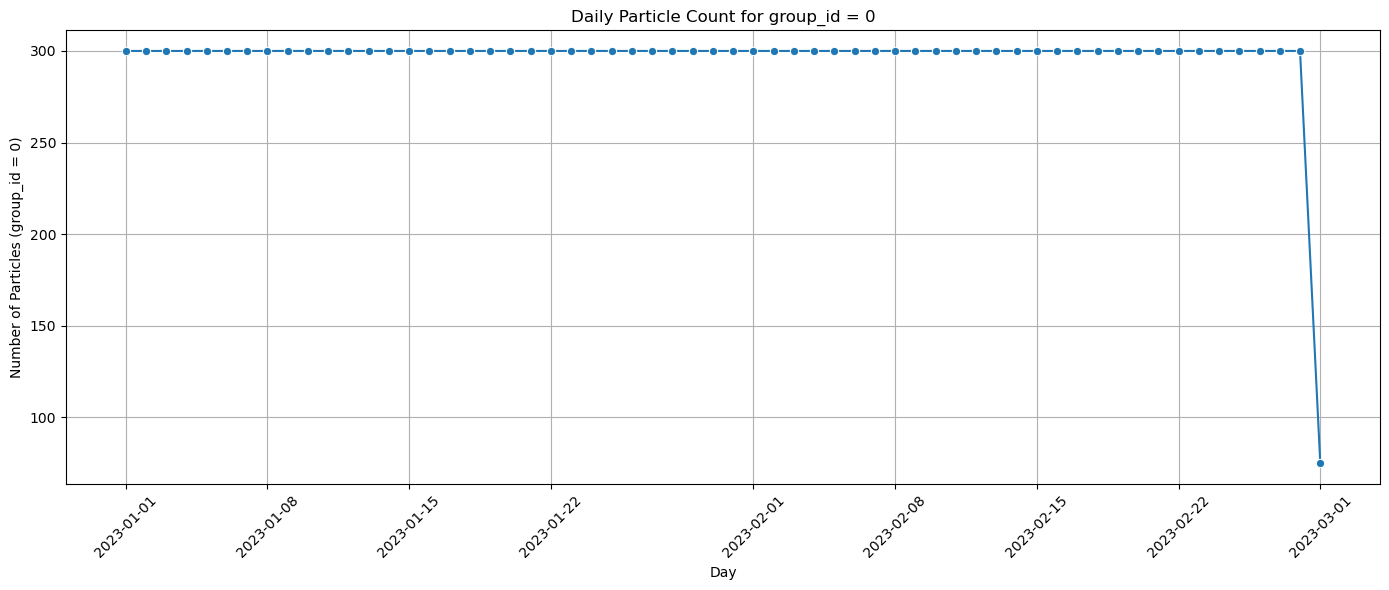

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure 'day' column is in datetime format
df['day'] = pd.to_datetime(df['day'])

# Step 2: Filter for group_id = 0
df_group0 = df[df['group_id'] == 162]

# Step 3: Count number of particles per day
daily_counts = df_group0.groupby('day').size().reset_index(name='particle_count')

# Step 4: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_counts, x='day', y='particle_count', marker='o', linewidth=1.5)

plt.xlabel('Day')
plt.ylabel('Number of Particles (group_id = 0)')
plt.title('Daily Particle Count for group_id = 0')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


/tmp/ipykernel_2482/2722929507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group0['month'] = df_group0['time'].dt.to_period('M')


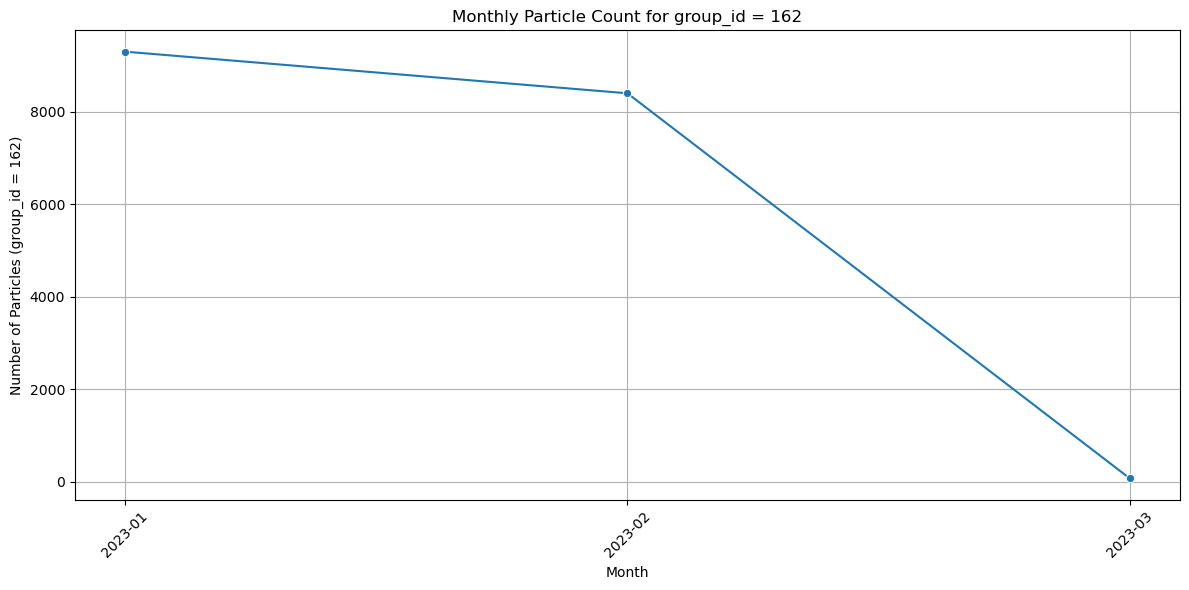

In [44]:
df = ds.to_dataframe().reset_index()  # This df has a 'time' column

# Filter for group_id = 162
df_group0 = df[df['group_id'] == 162]

# Extract month as a period (e.g., 2023-01)
df_group0['month'] = df_group0['time'].dt.to_period('M')

# Count number of particles per month
monthly_counts = df_group0.groupby('month').size().reset_index(name='particle_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x=monthly_counts['month'].astype(str), y='particle_count', marker='o', linewidth=1.5)
plt.xlabel('Month')
plt.ylabel('Number of Particles (group_id = 162)')
plt.title('Monthly Particle Count for group_id = 162')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [6]:
# Convert to a DataFrame for easier manipulation
df = ds.to_dataframe().reset_index()  # Resetting the index to make 'time' a column

# Check the first few rows to confirm the structure of the DataFrame
print(df.head())

# Filter the data for the specific day and group_id = 0
filtered_df = df[(df['month'] == '2023-01') & (df['group_id'] == 0)]

# Count the occurrences of group_id = 0 on the day 2023-01-01
occurrences = filtered_df[filtered_df['time'] == '2023-01-01'].shape[0]

# Print the result
print(f"Occurrences of group_id=0 on 2023-01: {occurrences}")

        time  particles  group_id   longitude   latitude  depth  host_fvcom  \
0 2023-01-01          0         0  275.333893  45.742802    0.0        -999   
1 2023-01-01          1         0  275.335114  45.742802    0.0        -999   
2 2023-01-01          2         0  275.336304  45.742802    0.0        -999   
3 2023-01-01          3         0  275.337494  45.742802    0.0        -999   
4 2023-01-01          4         0  275.338715  45.742802    0.0        -999   

   error_status  in_domain  is_beached  land_boundary_encounters  \
0             0          0           0                         0   
1             0          0           0                         0   
2             0          0           0                         0   
3             0          0           0                         0   
4             0          0           0                         0   

         thetao            so group_number    month  
0  1.000000e+20  1.000000e+20     00230102  2023-01  
1  1.000

In [ ]:
# Convert to a DataFrame for easier manipulation
df = ds.to_dataframe().reset_index()  # Resetting the index to make 'time' a column

# Check the first few rows to confirm the structure of the DataFrame
print(df.head())

# Filter the data for group_id = 0
filtered_df = df[df['group_id'] == 0].copy()  # Use copy() to avoid warning

# Extract the date part from the 'time' column (ignoring the time)
filtered_df['date'] = filtered_df['time'].dt.date  # Extract just the date

# Extract the month and year for filtering (not necessary if you want it for the whole month)
filtered_df['month'] = filtered_df['time'].dt.to_period('M')  # Period format for month

# Filter for January 2023 (if you need this specifically)
filtered_january = filtered_df[filtered_df['month'] == '2023-01']

# Now count the total occurrences of group_id = 0 for each day in January 2023
# We simply count the number of rows (i.e., occurrences) for each unique day
total_occurrences_per_day = filtered_january.groupby('date').size().sum()

# Print the result
print(f"Total occurrences of group_id=0 in January 2023 (considering each day only once): {total_occurrences_per_day}")

In [ ]:
# Convert to a DataFrame for easier manipulation
df = ds.to_dataframe().reset_index()  # Resetting the index to make 'time' a column

# Check the first few rows to confirm the structure of the DataFrame
print(df.head())

# Filter the data for group_id = 0
filtered_df = df[df['group_id'] == 0].copy()  # Use copy() to avoid warning

# Extract the date part from the 'time' column (ignoring the time)
filtered_df['date'] = filtered_df['time'].dt.date  # Extract just the date

# Extract the month and year for filtering (to use as a period for monthly data)
filtered_df['month'] = filtered_df['time'].dt.to_period('M')  # Period format for month

# Group by month and count the unique days in each month where group_id = 0 occurred
unique_days_per_month = filtered_df.groupby('month')['date'].nunique()

# Group by month and count the total occurrences of group_id = 0
total_occurrences_per_month = filtered_df.groupby('month').size()

# Combine the two results into a DataFrame for display
monthly_summary = pd.DataFrame({
    'unique_days': unique_days_per_month,
    'total_occurrences': total_occurrences_per_month
})

# Print the result
print(f"Summary for each month (unique days and total occurrences): \n{monthly_summary}")


In [ ]:

# Assuming 'ds' is your xarray dataset
# Convert the dataset to a DataFrame
df = ds.to_dataframe().reset_index()  # Resetting the index to make 'time' a column

# Check the first few rows to confirm the structure of the DataFrame
print(df.head())

# Extract the month and year from 'time'
df['month'] = df['time'].dt.to_period('M')  # Convert to a period representing the month

# Calculate the number of days in each month using vectorized operations
# Get the number of days in each month by creating a DateTimeIndex and using the 'days_in_month' accessor
df['days_in_month'] = pd.to_datetime(df['month'].dt.start_time).dt.days_in_month

# Print the first few rows to verify the new column
print(df[['time', 'month', 'days_in_month']].head())